# Engineers Graduate Salary Prediction

Dataset from Kaggle : **"Engineering Graduate Salary Prediction"** by *Manish Kc*  
Source: https://www.kaggle.com/datasets/manishkc06/engineering-graduate-salary-prediction


![Graduation!](images/graduates.jpg)

## How can (engineering?) undergraduates predict their expected salary?
> - ###  Does it pay well?
> - ###  Is there demand for what i'm currently studying?
> - ###  What can I expect for various different jobs under engineering?
---


School of Computer Science and Engineering  
Nanyang Technological University

> - Faiz Bin Rosli ([FAIZ007@e.ntu.edu.sg](mailto:FAIZ007@e.ntu.edu.sg))  
> - Kang Jun Hui Bryan ([KANG0121@e.ntu.edu.sg](mailto:KANG0121@e.ntu.edu.sg)) 
> - Low Zheng Han  ([ZLOW030@e.ntu.edu.sg](mailto:ZLOW030@e.ntu.edu.sg)) 


---

### Import Libraries


---

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

---

In [2]:
filename = "Engineering_graduate_salary.csv"
salary = pd.read_csv(filename)
salary.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Description of the dataset, according to Kaggle

- ##### General Identification
> **ID**: A unique ID to identify a candidate  
- ##### Main Response
> **Salary**: Annual CTC offered to the candidate (in INR) 
- ##### User's description
> **Gender**: Candidate's gender  
> **DOB**: Date of birth of the candidate  
- ##### Grade 10 and 12 scores
> **10percentage**: Overall marks obtained in grade 10 examinations  
> **10board**: The school board whose curriculum the candidate followed in grade 10  
> **12graduation**: Year of graduation - senior year high school  
> **12percentage**: Overall marks obtained in grade 12 examinations  
> **12board**: The school board whose curriculum the candidate followed  
- ##### College's details
> **CollegeID**: Unique ID identifying the university/college which the candidate attended for her/his undergraduate  
> **CollegeTier**: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.  
> **Degree**: Degree obtained/pursued by the candidate  
> **Specialization**: Specialization pursued by the candidate  
> **CollegeGPA**: Aggregate GPA at graduation  
> **CollegeCityID**: A unique ID to identify the city in which the college is located in.  
> **CollegeCityTier**: The tier of the city in which the college is located in. This is annotated based on the population of the cities.  
> **CollegeState**: Name of the state in which the college is located  
> **GraduationYear**: Year of graduation (Bachelor's degree)  
- ##### Scores according to AMCAT(AMCAT is a job portal) https://www.myamcat.com/
> **English**: Scores in AMCAT English section  
> **Logical**: Score in AMCAT Logical ability section  
> **Quant**: Score in AMCAT's Quantitative ability section  
> **Domain**: Scores in AMCAT's domain module  
> **ComputerProgramming**: Score in AMCAT's Computer programming section  
> **ElectronicsAndSemicon**: Score in AMCAT's Electronics & Semiconductor Engineering section  
> **ComputerScience**: Score in AMCAT's Computer Science section  
> **MechanicalEngg**: Score in AMCAT's Mechanical Engineering section  
> **ElectricalEngg**: Score in AMCAT's Electrical Engineering section  
> **TelecomEngg**: Score in AMCAT's Telecommunication Engineering section  
> **CivilEngg**: Score in AMCAT's Civil Engineering section  
- ##### Personality
> **conscientiousness**: Scores in one of the sections of AMCAT's personality test  
> **agreeableness**: Scores in one of the sections of AMCAT's personality test  
> **extraversion**: Scores in one of the sections of AMCAT's personality test  
> **nueroticism**: Scores in one of the sections of AMCAT's personality test  
> **openesstoexperience**: Scores in one of the sections of AMCAT's personality test  

---
Check the vital statistics of the dataset using the type and shape attributes.

In [3]:
print(salary.info())

# Checking for outliers
print(salary.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [4]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
#check for missing data
draw_missing_data_table(salary)

,Total,Percent
ID,0,0.0
ElectricalEngg,0,0.0
Quant,0,0.0
Domain,0,0.0
ComputerProgramming,0,0.0
ElectronicsAndSemicon,0,0.0
ComputerScience,0,0.0
MechanicalEngg,0,0.0
TelecomEngg,0,0.0
Gender,0,0.0


In [6]:
salary.shape

(2998, 34)

In [7]:
salary.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

---
### Exploring the Dataset

On first glance, we can start by removing any columns that doesn't have any significant meaning towards predicting salary.
> **ID** : A unique ID to identify a candidate (It's just an identification to identify a candidate that doesn't not affect the salary)  
> **Gender** : Male or Female
> **DOB** : Date of birth of the candidate (A graduate's Date of Birth shouldn't have any impact on the salary)  
> **CollegeCityID**: A unique ID to identify the city in which the college is located in. (Just like that ID, it doesn't affect the salary)  
> **12graduation**: Year of graduation - senior year high school(The year would not have any impact on the salary as well as it's just the graduation year of 12 grade)  
> **10board**: The school board whose curriculum the candidate followed in grade 10  
> **12board**: The school board whose curriculum the candidate followed  
> **CollegeCityID**: A unique ID to identify the city in which the college is located in.  
> **CollegeState**: Name of the state in which the college is located  
> **CollegeCityTier**: The tier of the city in which the college is located in. This is annotated based on the population of the cities. (The tier is classify by the population, not how well the CollegeCityTier is)  
> **CollegeTier**: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.  
> **GraduationYear**: Year of graduation (Bachelor's degree)  

---

In [8]:
# dropping features which do not make any sense to predict salary
salary.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState', 'CollegeCityTier',"DOB","Gender","GraduationYear","CollegeTier"], axis = 1, inplace = True)

In [9]:
salary.shape

(2998, 22)

### 10percentage and 12percentage

> **10percentage**: Overall marks obtained in grade 10 examinations  
> **12percentage**: Overall marks obtained in grade 12 examinations  


We will take a look into the relationship between these two columns

In [10]:
gradeExamMarks = salary[['10percentage', '12percentage']].copy() #overall marks obtained in grade 10/12 examination
personality = pd.DataFrame(salary[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']]) #5types of personalies datasets

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

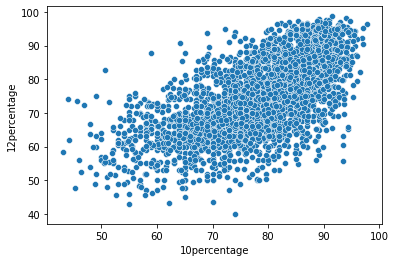

In [11]:
sns.scatterplot(gradeExamMarks['10percentage'], gradeExamMarks['12percentage'])

### From the scatterplot we can derive above, it's a big cluster, however we can see that it forms a linear relationship between 10 percentage and 12 percentage, so if one performs well in Grade 10, he/she likewise will perform well in Grade 12.

### Exploring Personality

> **conscientiousness**: Scores in one of the sections of AMCAT's personality test  
> **agreeableness**: Scores in one of the sections of AMCAT's personality test  
> **extraversion**: Scores in one of the sections of AMCAT's personality test  
> **nueroticism**: Scores in one of the sections of AMCAT's personality test  
> **openesstoexperience**: Scores in one of the sections of AMCAT's personality test  

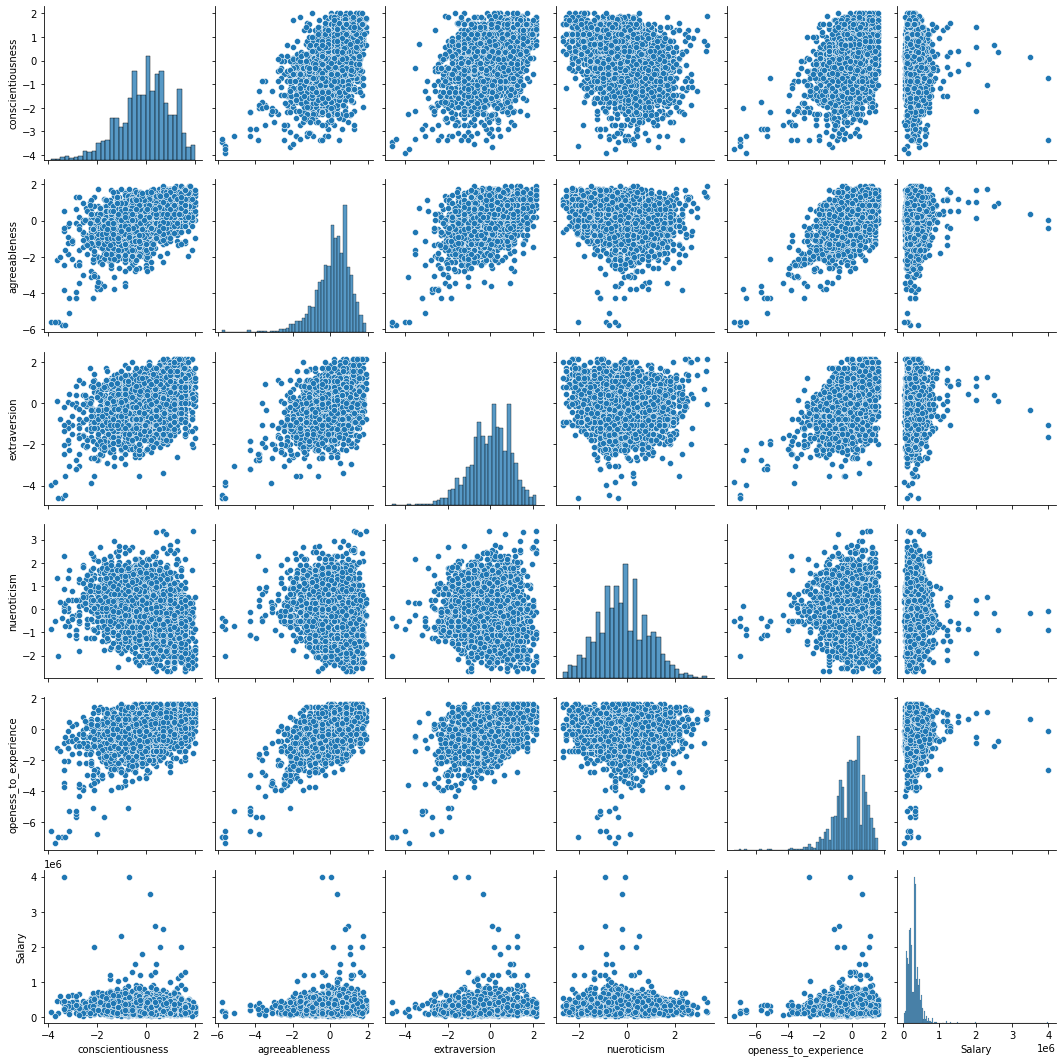

In [12]:
sns.pairplot(data = personality)

---

### Looking into English, Logical and Quant according to AMCAT
> **English**: Scores in AMCAT English section  
> **Logical**: Score in AMCAT Logical ability section  
> **Quant**: Score in AMCAT's Quantitative ability section  

---

Text(0.5, 1.0, 'Quant')

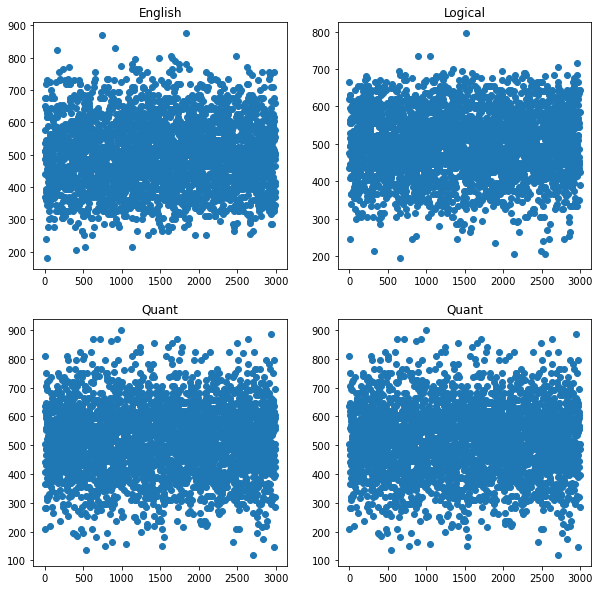

In [13]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(salary.index, salary['English'])
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(salary.index, salary['Logical'])
plt.title('Logical')


plt.subplot(2,2,3)
plt.scatter(salary.index, salary['Quant'])
plt.title('Quant')


plt.subplot(2,2,4)
plt.scatter(salary.index, salary['Quant'])
plt.title('Quant')

---

### Looking into rest of AMCAT's score
> **Domain**: Scores in AMCAT's domain module  
> **ComputerProgramming**: Score in AMCAT's Computer programming section  
> **ElectronicsAndSemicon**: Score in AMCAT's Electronics & Semiconductor Engineering section  
> **ComputerScience**: Score in AMCAT's Computer Science section  
> **MechanicalEngg**: Score in AMCAT's Mechanical Engineering section  
> **ElectricalEngg**: Score in AMCAT's Electrical Engineering section  
> **TelecomEngg**: Score in AMCAT's Telecommunication Engineering section  
> **CivilEngg**: Score in AMCAT's Civil Engineering section  

---

Text(0.5, 1.0, 'ComputerScience')

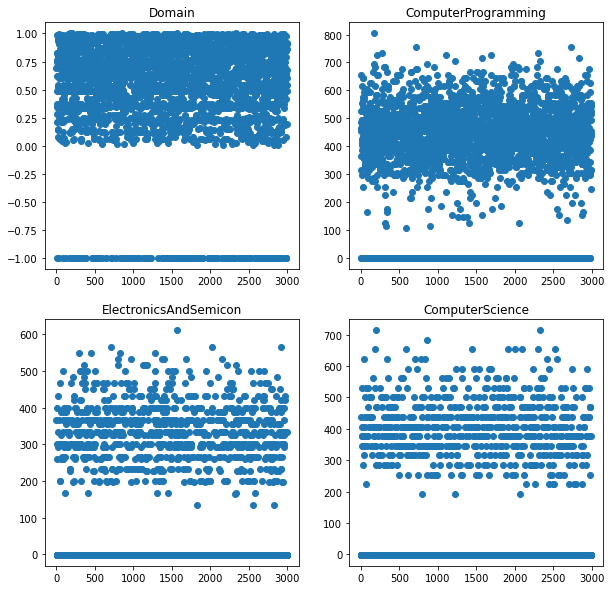

In [14]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(salary.index, salary['Domain'])
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(salary.index, salary['ComputerProgramming'])
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(salary.index, salary['ElectronicsAndSemicon'])
plt.title('ElectronicsAndSemicon')

plt.subplot(2,2,4)
plt.scatter(salary.index, salary['ComputerScience'])
plt.title('ComputerScience')



Text(0.5, 1.0, 'CivilEngg')

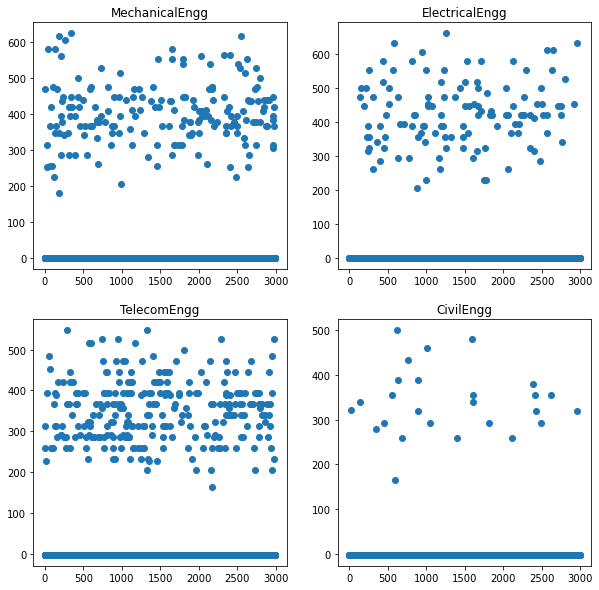

In [15]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(salary.index, salary['MechanicalEngg'])
plt.title('MechanicalEngg')

plt.subplot(2,2,2)
plt.scatter(salary.index, salary['ElectricalEngg'])
plt.title('ElectricalEngg')

plt.subplot(2,2,3)
plt.scatter(salary.index, salary['TelecomEngg'])
plt.title('TelecomEngg')

plt.subplot(2,2,4)
plt.scatter(salary.index, salary['CivilEngg'])
plt.title('CivilEngg')

### AMCAT Scores

As one can notice, there are a number of -1 values in each of the columns 
Lets replace -1 with a NaN value, then, we will replace all NaN Values with the **Mean** of that specific column.

In [16]:
# replace -1 and then fill with nan values
salary.replace(-1, np.NaN,inplace=True)

In [17]:
# lets check the missing values again
salary.isnull().sum()

10percentage                0
12percentage                0
Degree                      0
Specialization              0
collegeGPA                  0
English                     0
Logical                     0
Quant                       0
Domain                    179
ComputerProgramming       650
ElectronicsAndSemicon    2133
ComputerScience          2298
MechanicalEngg           2811
ElectricalEngg           2876
TelecomEngg              2724
CivilEngg                2972
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Salary                      0
dtype: int64

In [18]:
# list of columns with null values 
missing_values_columns = [col for col in salary.columns if salary.isnull().sum()[col] > 0]

In [19]:
# function for missing values substitution
def fill_missing_values(df,missing_values_columns):
    data = df.copy()
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())
     
    return data

# lets use this function to fill the missing values with mean
salary = fill_missing_values(salary,missing_values_columns)

---

### Using heatmap to see the correlation between numerical columns.


---

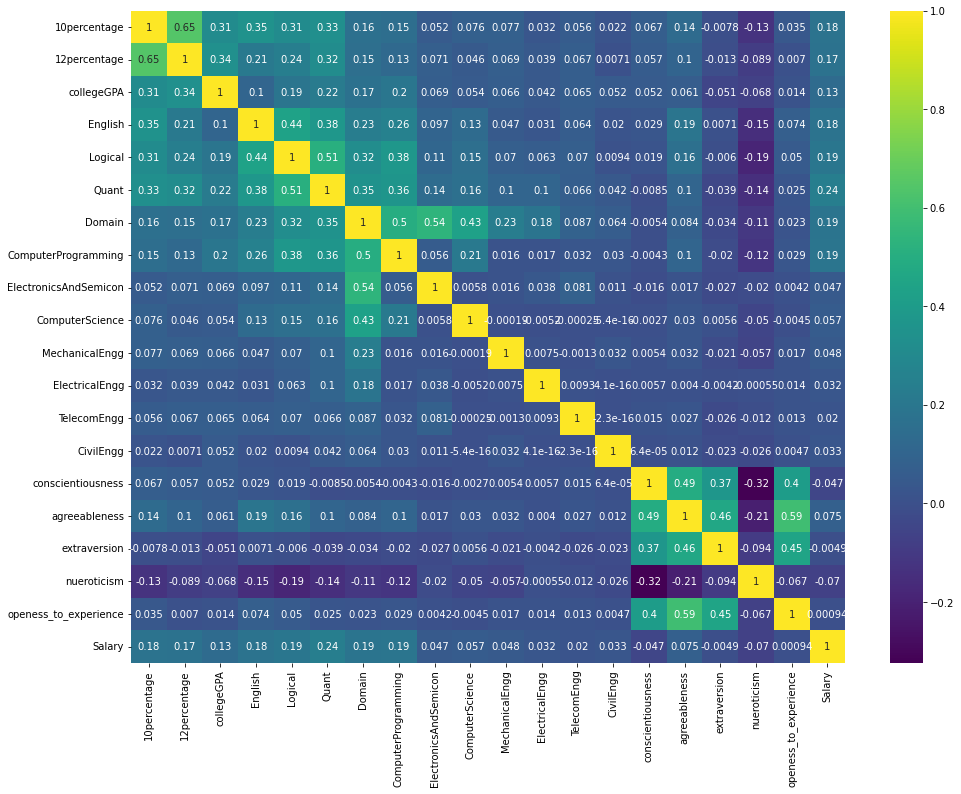

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(salary.corr(),annot=True,cmap='viridis')
plt.show()
#highest correlation to salary is 0.24

---

### Highest correlation to Salary is 0.24 by Quant, followed by Logical, Domain, Computer Programming, English, 10 percentage.


---

---

### Looking into Salary Distribution


---

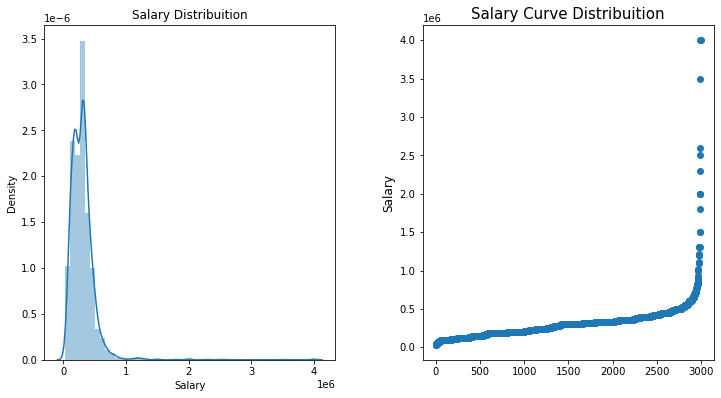

In [21]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(salary['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(salary.shape[0]), np.sort(salary.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [22]:
# checking the count of unique specialization present in dataframe
salary.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

### Specialization

Too many values with less than 10 in other

Add all the value count less than 10, into other, similiar names of specialization is also grouped together.

In [23]:
# create the copy of dataframe
data = salary.copy()
# count of unique categories in specialization
value_count = data['Specialization'].value_counts()

def map_to_other_specialization(var):
    ''' if count of unique category is less than 10, replace the category as other '''
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var
    
# apply the function to specialization to get the results    
salary['Specialization'] = salary.Specialization.apply(map_to_other_specialization)

In [24]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
salary['Specialization'] = salary['Specialization'].str.replace('electronics & instrumentation eng','electronics and instrumentation engineering')

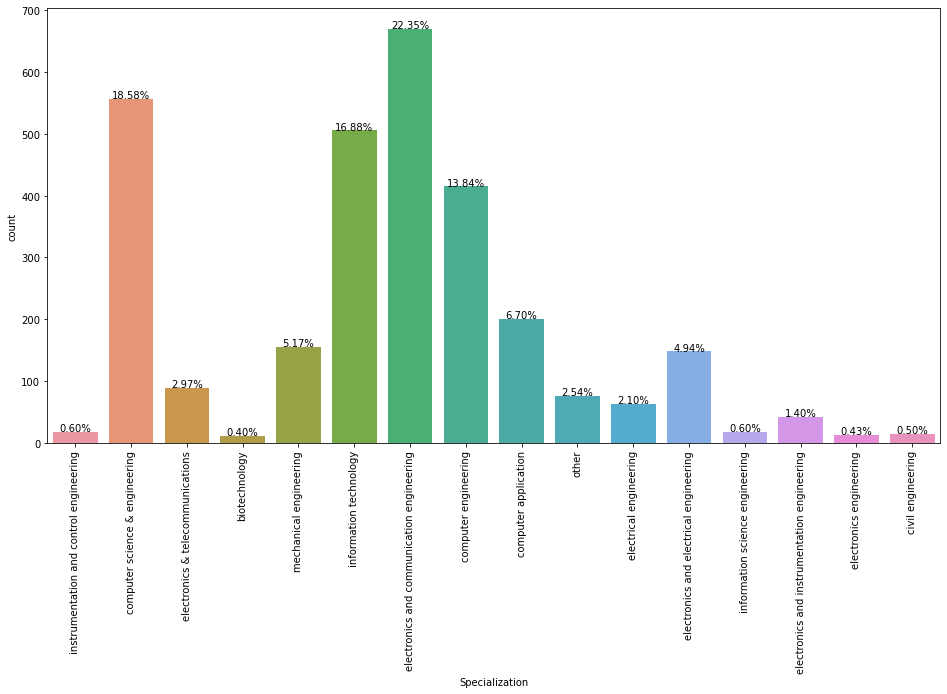

In [25]:
# count plot of unique categories in specialization 
plt.figure(figsize = (16, 8))
total = float(len(salary))
ax = sns.countplot(x='Specialization',data=salary)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.xticks(rotation = 90)
plt.show()

### Specialization
From the data above, we can see that the specialization that stands out the most is `electronics and communication engineering` followed by `computer science & engineering`

`biotechnology` and `electronics engineering` are the specialization that are not very popular both are the lowest value.

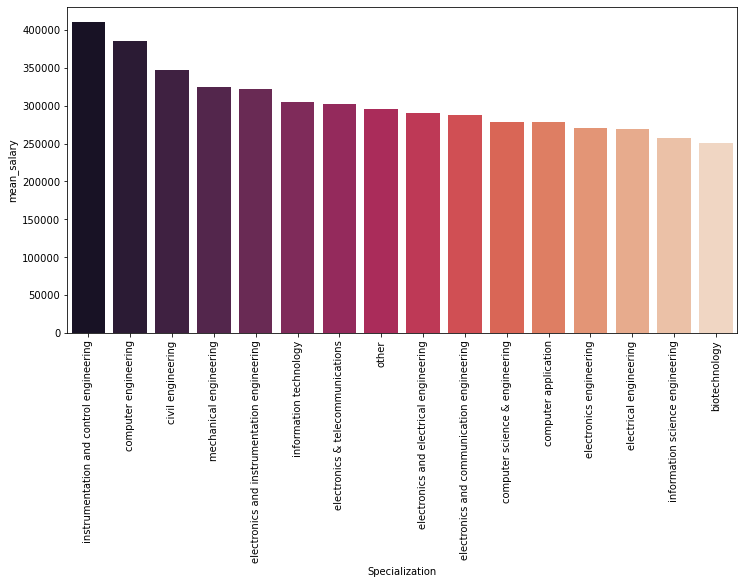

In [26]:
# average salary by specialization and sort them in decreasing order
avg_sal_per_specialization = salary.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

### Specialization
From the data above, we can see that the even the two most popular specialization doesn't always gives the best salary.  

`instrumentation and control engineering` are the specialization that have the highest average salary.


### One hot encoding the categorical columns

A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1

In [27]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in salary.columns if salary.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in salary.columns if (salary.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


Categorical Features are :  ['Degree', 'Specialization']


In [28]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    df = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col])
        # concatenating dummies and original dataframe
        df = pd.concat([df, dummies], axis=1)
        
        # dropping original coolumns for which encoding is applied.
        df.drop(col, axis=1,inplace=True)
    return df

In [29]:
old_salary = salary
salary = onehot_encoder(salary,categorical_columns)

In [30]:
# drop one column from each encoded categorical feature to avoid dummy trap 
salary.drop(['M.Sc. (Tech.)','biotechnology'],axis=1,inplace=True)

### Min-Max Scaler
Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['10percentage', '12percentage', 'collegeGPA', 'English','Logical','Quant','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','Salary']
salary[num_vars] = scaler.fit_transform(salary[num_vars])

salary

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,...,electronics & telecommunications,electronics and communication engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,information science engineering,information technology,instrumentation and control engineering,mechanical engineering,other
0,0.818115,0.749574,0.720150,0.676259,0.783333,0.884615,0.694479,0.543634,0.486430,0.410137,...,0,0,0,0,0,0,0,1,0,0
1,0.255661,0.417376,0.625616,0.374101,0.400000,0.115385,0.342315,0.371960,0.423763,0.410137,...,0,0,0,0,0,0,0,0,0,0
2,0.626917,0.769506,0.592819,0.438849,0.466667,0.493590,0.824666,0.492924,0.557411,0.410137,...,1,0,0,0,0,0,0,0,0,0
3,0.754200,0.783646,0.790675,0.712230,0.708333,0.660256,0.990009,0.786838,0.423763,0.410137,...,0,0,0,0,0,0,0,0,0,0
4,0.712199,0.596252,0.618114,0.568345,0.500000,0.314103,0.278457,0.300429,0.423763,0.410137,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.584368,0.562181,0.679207,0.467626,0.483333,0.416667,0.538387,0.200286,0.417537,0.410137,...,0,1,0,0,0,0,0,0,0,0
2994,0.748722,0.630324,0.734941,0.237410,0.650000,0.352564,0.190153,0.300429,0.423763,0.410137,...,0,0,0,0,0,0,1,0,0,0
2995,0.883857,0.435434,0.713398,0.294964,0.383333,0.467949,0.600057,0.472103,0.423763,0.410137,...,0,0,0,0,0,0,1,0,0,0
2996,0.833455,0.428620,0.730761,0.410072,0.750000,0.493590,0.901490,0.629471,0.423763,0.410137,...,0,0,0,0,0,0,0,0,0,0


In [36]:
old_salary.columns

Index(['10percentage', '12percentage', 'Degree', 'Specialization',
       'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

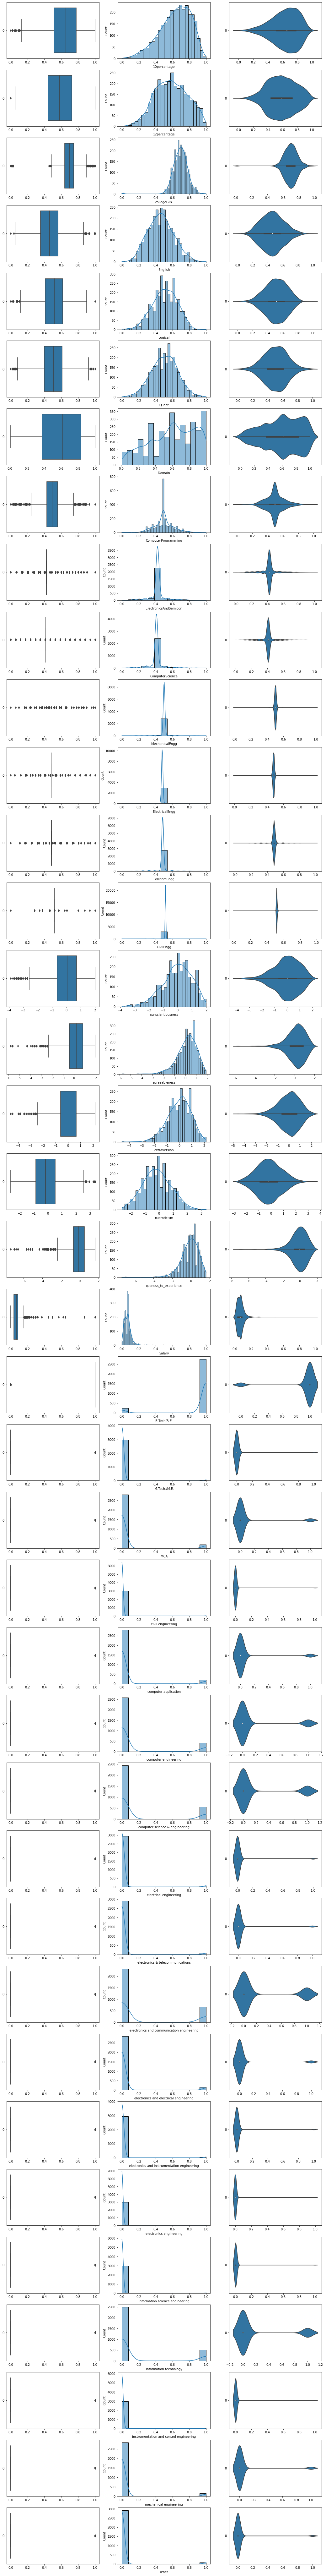

In [42]:
import matplotlib.pyplot as plt
# Draw the distributions of all variables
f, axes = plt.subplots(38, 3, figsize=(18, 150))

count = 0
for var in salary:
    sns.boxplot(data = salary[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = salary[var], ax = axes[count,1], kde = True)
    sns.violinplot(data = salary[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
salary.head(15)

### Lets begin building our model

Lets start with LinearRegression, one of the most common model in predicting a numerical value


Split the dataset in Train and Test sets, uniformly at random.   
Train Set with 80% of data and Test Set with 20% of data.     

In [ ]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(salary, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
df_train.head()

In [ ]:
# Dividing the training data set into X and Y
y_train = df_train.pop('Salary')
X_train = df_train

In [ ]:
X_train.head()

In [ ]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

# lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
# lr_1.summary()

In [ ]:
lr_1.summary()

We have to see the multicollinearity between the variables. We do that by calculating the VIF value. Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for VIF is: VIF = 1/(1-Ri²)

We consider the variables generally having a value <5.

Drop variables having high p and high VIF.

repeat this process till every column’s p-value is <0.005 and VIF is <5 (optional here)

We will not drop Engineering Specializations here.

In [ ]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train.pop("10percentage")

In [ ]:
X_train_lm = sm.add_constant(X_train)

# lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
# lr_1.summary()

In [ ]:
print(lr_1.summary())

Before making predictions, we have to see whether the error terms are normally distributed or not. We’ll do that by using Residual Analysis.
Error-terms = y_actual - y_predicted
The difference between the actual y-value and the predicted y-value using the model at that particular x-value is the error term.

Residual Analysis of the train data
We have to check if the error terms are normally distributed (which is one of the major assumptions of linear regression); let us plot the error terms’ histogram.

In [ ]:
y_train_salary = lr_1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_salary), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# Dividing the training data set into X and Y
y_test = df_test.pop('Salary')
X_test = df_test

In [ ]:
X_test.pop("10percentage")

In [ ]:
X_test.head()

In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)


# Making predictions using the final model
y_pred = lr_1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

In [ ]:
# Adding constant variable to train dataframe
X_train = sm.add_constant(X_train)


# Making predictions using the final model
y_pred_train = lr_1.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true = y_train, y_pred = y_pred_train)

Since the R² values for both the train and test data are almost equal, the model we built is the best-fitted model.

For the trained model, R² calculated again to compare the results,
else the R² value for trained model can also be seen in the Model Summary.

In [ ]:
import sklearn.metrics as sm
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = lr_1.predict(X_test)
testPredDf["Actual"] = y_test.values
testPredDf.head()

In [ ]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

In [ ]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

CONCLUSION:
    LR with stats model produce the lowest RMSE and MAPE hence making it the best model as compared to the other models

### Trying another model - XGBoost

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

But what makes XGBoost so popular?

Speed and performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.

Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.

Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. But wait, what is boosting? Well, keep on reading.

Import the `XGBRegressor` model from `xgboost`.


Reference :  https://www.datacamp.com/community/tutorials/xgboost-in-python

In [43]:
from xgboost import XGBRegressor

In [ ]:
XG_raw = XGBRegressor(random_state =100).fit(X_train,y_train)

In [ ]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = XG_raw.predict(X_test)
testPredDf["Actual"] = y_test.values
testPredDf.head()

In [ ]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

In [ ]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

### AdaBoost Regression

An AdaBoost regressor. An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

Import the `GradientBoostingRegressor` model from `sklearn.ensemble`.


Reference :  https://en.wikipedia.org/wiki/Gradient_boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
Ada_raw = AdaBoostRegressor(random_state =100).fit(X_train,y_train)

In [ ]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = Ada_raw.predict(X_test)
testPredDf["Actual"] = y_test.values
testPredDf.head()

In [ ]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

In [ ]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

### Gradient Boosting for regression

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees

It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

Import the `GradientBoostingRegressor` model from `sklearn.ensemble`.


Reference :  https://en.wikipedia.org/wiki/Gradient_boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GD_raw = GradientBoostingRegressor(random_state =100).fit(X_train,y_train)

In [ ]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = GD_raw.predict(X_test)
testPredDf["Actual"] = y_test.values
testPredDf.head()

In [ ]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

In [ ]:
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)